In [1]:
import cv2
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ultralytics
from ultralytics import YOLO

In [2]:
path0 = r'C:\Users\sagar\Desktop\Yoga-Posture-Analysis\Yolo_V8\DATASET\TEST\tree\00000001.jpg'

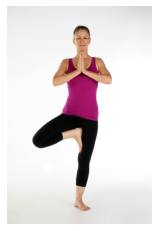

In [3]:
img=plt.imread(path0)
plt.imshow(img)#, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.show()

In [4]:
!yolo pose predict model=yolov8n-pose.pt source={path0} 

Ultralytics YOLOv8.0.235 🚀 Python-3.10.0 torch-2.1.2+cpu CPU (AMD Ryzen 5 3500U with Radeon Vega Mobile Gfx)
YOLOv8n-pose summary (fused): 187 layers, 3289964 parameters, 0 gradients, 9.2 GFLOPs

image 1/1 C:\Users\sagar\Desktop\Yoga-Posture-Analysis\Yolo_V8\DATASET\TEST\tree\00000001.jpg: 640x448 1 person, 316.3ms
Speed: 16.8ms preprocess, 316.3ms inference, 19.7ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs\pose\predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [7]:
path2 = r'C:\Users\sagar\Desktop\Yoga-Posture-Analysis\Yolo_V8\runs\pose\predict4\00000001.jpg'

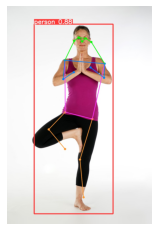

In [8]:
img=plt.imread(path2)
plt.imshow(img)
plt.axis('off')
plt.show()

In [9]:
# Load a model
model = YOLO('yolov8n-pose.pt')  # load an official model
# Predict with the model
results = model(path0)  


image 1/1 C:\Users\sagar\Desktop\Yoga-Posture-Analysis\Yolo_V8\DATASET\TEST\tree\00000001.jpg: 640x448 1 person, 296.2ms
Speed: 11.2ms preprocess, 296.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 448)


    A class for storing and manipulating inference results.

    Args:
        orig_img (numpy.ndarray): The original image as a numpy array.
        path (str): The path to the image file.
        names (dict): A dictionary of class names.
        boxes (torch.tensor, optional): A 2D tensor of bounding box coordinates for each detection.
        masks (torch.tensor, optional): A 3D tensor of detection masks, where each mask is a binary image.
        probs (torch.tensor, optional): A 1D tensor of probabilities of each class for classification task.
        keypoints (List[List[float]], optional): A list of detected keypoints for each object.

    Attributes:
        orig_img (numpy.ndarray): The original image as a numpy array.
        orig_shape (tuple): The original image shape in (height, width) format.
        boxes (Boxes, optional): A Boxes object containing the detection bounding boxes.
        masks (Masks, optional): A Masks object containing the detection masks.
        probs (Probs, optional): A Probs object containing probabilities of each class for classification task.
        names (dict): A dictionary of class names.
        path (str): The path to the image file.
        keypoints (Keypoints, optional): A Keypoints object containing detected keypoints for each object.
        speed (dict): A dictionary of preprocess, inference and postprocess speeds in milliseconds per image.
        _keys (tuple): A tuple of attribute names for non-empty attributes.
    

In [10]:
BOX=pd.DataFrame(columns=range(6))
for i in range(len(results)):
    arri=pd.DataFrame(results[i].boxes.data).astype(float)
    arri['i']=i
    BOX=pd.concat([BOX,arri],axis=0)
BOX.columns=['x','y','x2','y2','confidence','class','i']
display(BOX)

,x,y,x2,y2,confidence,class,i
0,136.0,91.0,532.0,1046.0,0.875221,0.0,0.0


In [11]:
results[0].boxes.data

tensor([[1.3600e+02, 9.1000e+01, 5.3200e+02, 1.0460e+03, 8.7522e-01, 0.0000e+00]])

In [12]:
results[0].keypoints

ultralytics.engine.results.Keypoints object with attributes:

conf: tensor([[0.9874, 0.9641, 0.9435, 0.8749, 0.6842, 0.9972, 0.9975, 0.9864, 0.9851, 0.9692, 0.9595, 0.9983, 0.9982, 0.9942, 0.9931, 0.9439, 0.9489]])
data: tensor([[[3.7727e+02, 1.7891e+02, 9.8742e-01],
         [3.9580e+02, 1.6378e+02, 9.6406e-01],
         [3.5935e+02, 1.5898e+02, 9.4347e-01],
         [4.2373e+02, 1.8155e+02, 8.7492e-01],
         [3.3715e+02, 1.7512e+02, 6.8420e-01],
         [4.9024e+02, 2.9025e+02, 9.9716e-01],
         [2.9006e+02, 2.7325e+02, 9.9750e-01],
         [4.8748e+02, 3.6161e+02, 9.8642e-01],
         [2.8235e+02, 3.6866e+02, 9.8514e-01],
         [4.1967e+02, 3.0983e+02, 9.6917e-01],
         [3.3516e+02, 3.3389e+02, 9.5950e-01],
         [4.2877e+02, 5.6877e+02, 9.9829e-01],
         [2.9251e+02, 5.3434e+02, 9.9823e-01],
         [3.6631e+02, 7.7322e+02, 9.9422e-01],
         [2.0980e+02, 6.2151e+02, 9.9312e-01],
         [3.8496e+02, 9.6374e+02, 9.4389e-01],
         [2.9147e+02, 7.204

In [13]:
results[0].keypoints.conf

tensor([[0.9874, 0.9641, 0.9435, 0.8749, 0.6842, 0.9972, 0.9975, 0.9864, 0.9851, 0.9692, 0.9595, 0.9983, 0.9982, 0.9942, 0.9931, 0.9439, 0.9489]])

[[     377.27      178.91]
 [      395.8      163.78]
 [     359.35      158.98]
 [     423.73      181.55]
 [     337.15      175.12]
 [     490.24      290.25]
 [     290.06      273.25]
 [     487.48      361.61]
 [     282.35      368.66]
 [     419.67      309.83]
 [     335.16      333.89]
 [     428.77      568.77]
 [     292.51      534.34]
 [     366.31      773.22]
 [      209.8      621.51]
 [     384.96      963.74]
 [     291.47      720.42]]


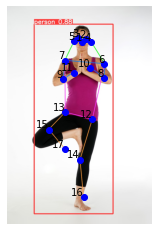

Angle between co-ordinates 1,2,3: 46.74 degrees
Angle between co-ordinates 2,3,4: 11.81 degrees
Angle between co-ordinates 3,4,5: 15.08 degrees
Angle between co-ordinates 4,5,6: 32.7 degrees
Angle between co-ordinates 5,6,7: 32.09 degrees
Angle between co-ordinates 6,7,8: 19.26 degrees
Angle between co-ordinates 7,8,9: 26.08 degrees
Angle between co-ordinates 8,9,10: 21.22 degrees
Angle between co-ordinates 9,10,11: 7.3 degrees
Angle between co-ordinates 10,11,12: 84.16 degrees
Angle between co-ordinates 11,12,13: 54.09 degrees
Angle between co-ordinates 12,13,14: 58.65 degrees
Angle between co-ordinates 13,14,15: 28.73 degrees
Angle between co-ordinates 14,15,16: 18.79 degrees
Angle between co-ordinates 15,16,17: 6.09 degrees


In [15]:
numpy_array = results[0].keypoints.data[0].numpy()
coordinates = numpy_array[:, 0:2]
print(coordinates)


"""The coordinates have been marked for representation for the goddess pose 
first image
[
    [405.2466,  60.0128],  # at the nose 
    [418.5668,  47.8398], # at the right eye
    [394.5231,  46.2677], # at the left eye
    [433.5818,  63.4811], # right ear
    [375.5804,  58.8397], # left ear
    [478.7749, 131.1518], # right shoulder
    [325.1884, 131.5727], # left shoulder 
    [525.2437, 215.4563], # right elbow
    [299.2421, 215.8858], # left elbow
    [438.4142, 207.9540], # right hand 
    [381.5312, 208.4352], # left hand
    [470.8839, 309.7605], # right thigh
    [350.0955, 311.3801], # left thigh
    [557.8467, 362.9910], # right knee
    [275.1894, 372.2162], # left knee
    [579.9728, 499.9867], # right foot
    [238.7405, 516.6460]  # left foot
  ] """

# Extract x and y coordinates
coordinates_x, coordinates_y = zip(*coordinates)

img=plt.imread(path2)
plt.imshow(img)
plt.axis('off')
plt.scatter(coordinates_x, coordinates_y, color='blue', marker='o')

# Add labels for each point
for i, (x, y) in enumerate(coordinates):
    plt.text(x, y, str(i+1), ha='right', va='bottom')

# Show the plot
plt.show()


def calculate_angle(coord1, coord2, coord3):
    vector1 = np.array(coord1) - np.array(coord2)
    vector2 = np.array(coord3) - np.array(coord2)

    dot_product = np.dot(vector1, vector2)
    magnitude1 = np.linalg.norm(vector1)
    magnitude2 = np.linalg.norm(vector2)

    cosine_angle = dot_product / (magnitude1 * magnitude2)

    # Calculate the angle in radians
    angle_rad = np.arccos(np.clip(cosine_angle, -1.0, 1.0))

    # Convert angle from radians to degrees
    angle_deg = np.degrees(angle_rad)

    return angle_deg

# Example coordinates
coord1 = [325.1884, 131.5727]
coord2 = [299.2421, 215.8858]
coord3 = [381.5312, 208.4352]

# Calculate the angle between the coordinates
for i in range(len(coordinates) - 2):
    angle = calculate_angle(coordinates[i], coordinates[i+1], coordinates[i+2])
    print(f"Angle between co-ordinates {i+1},{i+2},{i+3}: {round(angle, 2)} degrees")

In [16]:
results[0].keypoints.orig_shape

(1098, 728)

tensor([[[377.2698, 178.9065],
         [395.7972, 163.7812],
         [359.3466, 158.9756],
         [423.7254, 181.5500],
         [337.1460, 175.1215],
         [490.2421, 290.2514],
         [290.0641, 273.2521],
         [487.4794, 361.6106],
         [282.3537, 368.6580],
         [419.6721, 309.8338],
         [335.1640, 333.8884],
         [428.7668, 568.7662],
         [292.5148, 534.3374],
         [366.3105, 773.2233],
         [209.7955, 621.5115],
         [384.9615, 963.7388],
         [291.4661, 720.4180]]])
(1, 17, 2)


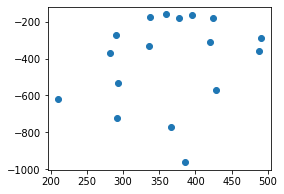

In [17]:
print(results[0].keypoints.xy)
boxes = np.array(results[0].keypoints.xy)
print(boxes.shape)
plt.figure(figsize=(4,3))
plt.scatter(boxes[0][:,0], -boxes[0][:,1], )
plt.show()

tensor([[[0.5182, 0.1629],
         [0.5437, 0.1492],
         [0.4936, 0.1448],
         [0.5820, 0.1653],
         [0.4631, 0.1595],
         [0.6734, 0.2643],
         [0.3984, 0.2489],
         [0.6696, 0.3293],
         [0.3878, 0.3358],
         [0.5765, 0.2822],
         [0.4604, 0.3041],
         [0.5890, 0.5180],
         [0.4018, 0.4866],
         [0.5032, 0.7042],
         [0.2882, 0.5660],
         [0.5288, 0.8777],
         [0.4004, 0.6561]]])
(1, 17, 2)


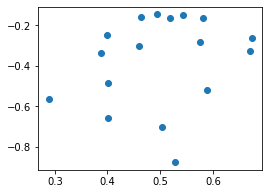

In [18]:
print(results[0].keypoints.xyn)
boxes = np.array(results[0].keypoints.xyn)
print(boxes.shape)
plt.figure(figsize=(4,3))
plt.scatter(boxes[0][:,0], -boxes[0][:,1], )
plt.show()

tensor([[1.3600e+02, 9.1000e+01, 5.3200e+02, 1.0460e+03, 8.7522e-01, 0.0000e+00]])


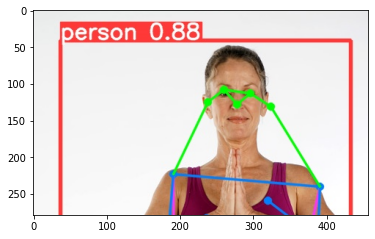

In [19]:
print(results[0].boxes.data)
img=plt.imread(path2)
plt.imshow(img[50:329,99:556])
plt.show()